# Image crop

In [299]:
import cv2
import numpy as np
import glob
img_path = "eyenet_0819/Age-related-macular-degeneration/drusen/drusen-0.jpg"
imgs = glob.glob('eyenet_0819/Age-related-macular-degeneration/drusen/*.jpg')

def classify(img_path, gradient, lb, ub):
    
    img = Image.open(img_path)
    img = np.asarray(img)

    vcut = int(img.shape[1]/2)
    hcut = int(img.shape[0]/2)

    img = np.mean(img,axis=2)
    indices = np.argwhere(img>=gradient)
    img[indices[:,0], indices[:,1]] = 200
    
    vline = np.mean(img[:,vcut-10:vcut+10],axis=1)
    plt.imshow(img)
    hline = np.mean(img[hcut-10:hcut+10,:],axis=0)
    vnum = len(vline[vline==200])
    hnum = len(hline[hline==200])
    
    if vnum <= ub and hnum <= lb:
        cls = 4
    elif vnum >= ub and hnum <= lb:
        cls = 6
    elif vnum >= ub and hnum >= ub:
        cls = 1
    elif vnum <= lb and  hnum >= ub:
        cls = 2
    else: cls = 1
    return cls

6

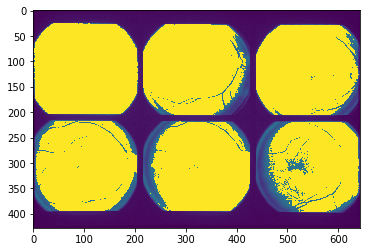

In [300]:
img_path = "eyenet_0819/Age-related-macular-degeneration/drusen/drusen-17.jpg"
classify(img_path, 80, 50, 100)

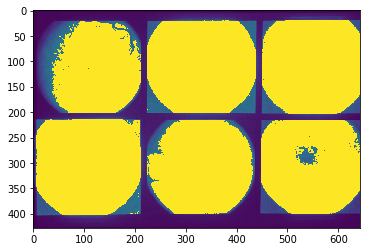

In [301]:
def modify(x):
    return int(x.split('.')[0].split('-')[1])

groups = {modify(img.split('/')[-1]) : classify(img, 80, 10, 100) for img in imgs}

In [302]:
groups_new = sorted(groups.items(), key= lambda x:x[0])

In [304]:
groups_new

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 6),
 (8, 1),
 (9, 6),
 (10, 6),
 (11, 6),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 6),
 (17, 6),
 (18, 6),
 (19, 1),
 (20, 1),
 (21, 6),
 (22, 1),
 (23, 6),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 6),
 (29, 6),
 (30, 6),
 (31, 1),
 (32, 6),
 (33, 6),
 (34, 6),
 (35, 6),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 6),
 (40, 6),
 (41, 6),
 (42, 1),
 (43, 1),
 (44, 6),
 (45, 6),
 (46, 6),
 (47, 6),
 (48, 6),
 (49, 6),
 (50, 6),
 (51, 6),
 (52, 6),
 (53, 6),
 (54, 4),
 (55, 6),
 (56, 2),
 (57, 4),
 (58, 1),
 (59, 6),
 (60, 6),
 (61, 6),
 (62, 1),
 (63, 1),
 (64, 6),
 (65, 6),
 (66, 6),
 (67, 6),
 (68, 6),
 (69, 6),
 (70, 6),
 (71, 6),
 (72, 6),
 (73, 6),
 (74, 1),
 (75, 6),
 (76, 2),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 1),
 (81, 6),
 (82, 1),
 (83, 6),
 (84, 6),
 (85, 1),
 (86, 6),
 (87, 1),
 (88, 6),
 (89, 1),
 (90, 1),
 (91, 6),
 (92, 1),
 (93, 1),
 (94, 6),
 (95, 6),
 (96, 4),
 (97, 4),
 (98, 6),
 (99, 1),
 (100, 1),

In [295]:
import os
from shutil import copyfile
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img_path = "eyenet_0819/Age-related-macular-degeneration/drusen/drusen-14.jpg"


def cut_save(x,y,w,h,im,img_path,i):
    region = im.crop((x, y, x+w, y+h))
    region.save(img_path.split('.')[0]+'-{}.jpg'.format(i))
    
    if os.path.exists(img_path.split('.')[0]+'.json'):
        src = img_path.split('.')[0]+'.json'
        dst = img_path.split('.')[0]+'-{}.json'.format(i)
        if src != dst:
            copyfile(src, dst)
    
def crop_4(img_path):
    if os.path.exists(img_path):
        im = Image.open(img_path)
        img_size = im.size
        w = img_size[0]/2.0
        h = img_size[1]/2.0

        cut_save(0,0,w,h,im,img_path,1)
        cut_save(w,h,w,h,im,img_path,2)
        cut_save(0,h,w,h,im,img_path,3)
        cut_save(w,0,w,h,im,img_path,4)

In [296]:
for img in img_4:
    crop_4("eyenet_0819/Age-related-macular-degeneration/drusen/drusen-{}.jpg".format(img))    

In [297]:
for img in img_4:
    os.remove("eyenet_0819/Age-related-macular-degeneration/drusen/drusen-{}.jpg".format(img))